In [107]:
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
%matplotlib inline

In [108]:
cd Downloads

[Errno 2] No such file or directory: 'Downloads'
/home/harshal/Downloads/dsg-problem


In [109]:
cd dsg-problem

[Errno 2] No such file or directory: 'dsg-problem'
/home/harshal/Downloads/dsg-problem


In [110]:
data=pd.read_csv('mushroom_train.csv')

# Data Visualisation


In [111]:
data.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,weight,ring-number,ring-type,spore-print-color,population,habitat
0,p,f,s,e,f,s,f,c,n,b,...,p,w,p,w,38,o,e,w,v,l
1,p,x,y,w,t,p,f,c,n,k,...,w,w,p,w,43,o,p,n,v,u
2,e,f,s,n,t,n,f,c,b,e,...,e,e,p,w,37,t,e,w,c,w
3,p,x,s,e,f,y,f,c,n,b,...,p,w,p,w,82,o,e,w,v,l
4,e,x,s,w,t,l,f,c,b,n,...,w,w,p,w,36,o,p,n,s,m


In [112]:
data.shape

(5686, 25)

In [113]:
target='class'
categorical_variables=[x for x in data.columns if x not in ['class','radius','weight']]

In [114]:
categorical_variables

['cap-shape',
 'cap-surface',
 'cap-color',
 'bruises',
 'odor',
 'gill-attachment',
 'gill-spacing',
 'gill-size',
 'gill-color',
 'stalk-shape',
 'stalk-root',
 'stalk-surface-above-ring',
 'stalk-surface-below-ring',
 'stalk-color-above-ring',
 'stalk-color-below-ring',
 'veil-type',
 'veil-color',
 'ring-number',
 'ring-type',
 'spore-print-color',
 'population',
 'habitat']

In [115]:
data[categorical_variables].apply(lambda x: len(x.unique()))

cap-shape                    6
cap-surface                  4
cap-color                   10
bruises                      2
odor                         9
gill-attachment              2
gill-spacing                 2
gill-size                    2
gill-color                  12
stalk-shape                  2
stalk-root                   5
stalk-surface-above-ring     4
stalk-surface-below-ring     4
stalk-color-above-ring       9
stalk-color-below-ring       9
veil-type                    1
veil-color                   4
ring-number                  3
ring-type                    5
spore-print-color            9
population                   6
habitat                      7
dtype: int64

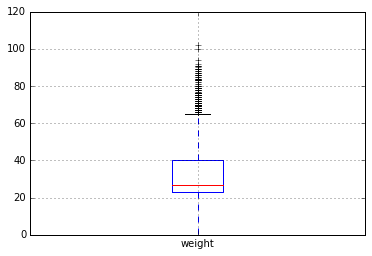

In [116]:
data.boxplot('weight',return_type='axes')

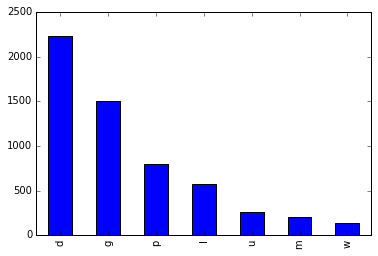

In [117]:
data.habitat.value_counts().plot(kind="bar")

In [118]:
data['class']=data['class'].map({'p':1,'e':0})
x0=data.iloc[:,1:]
y=data.iloc[:,0]

# Data Preprocessing 
#One-hot encoding

In [119]:
x=pd.get_dummies(x0)
x.head()

,radius,weight,cap-shape_b,cap-shape_c,cap-shape_f,cap-shape_k,cap-shape_s,cap-shape_x,cap-surface_f,cap-surface_g,...,population_s,population_v,population_y,habitat_d,habitat_g,habitat_l,habitat_m,habitat_p,habitat_u,habitat_w
0,215,38,0,0,1,0,0,0,0,0,...,0,1,0,0,0,1,0,0,0,0
1,94,43,0,0,0,0,0,1,0,0,...,0,1,0,0,0,0,0,0,1,0
2,244,37,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
3,286,82,0,0,0,0,0,1,0,0,...,0,1,0,0,0,1,0,0,0,0
4,110,36,0,0,0,0,0,1,0,0,...,1,0,0,0,0,0,1,0,0,0


# Correlation map between features

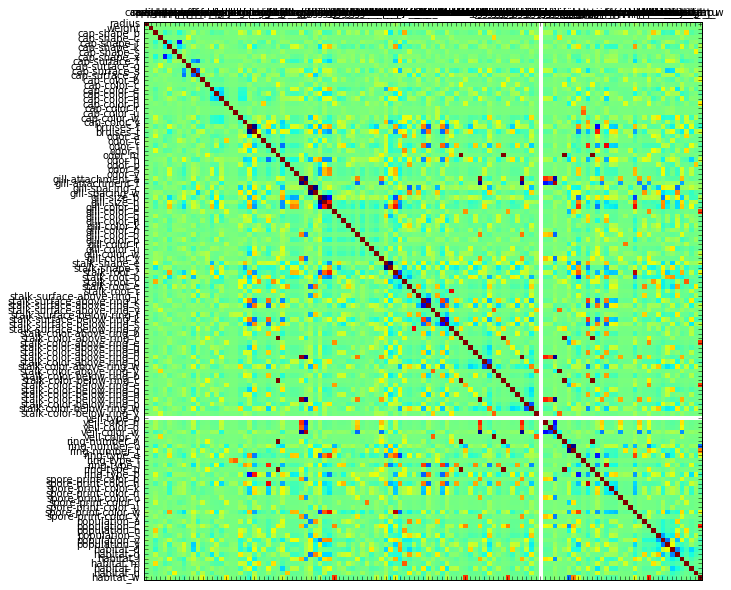

In [120]:
corr = x.corr()
fig, ax = plt.subplots(figsize=(10, 10))
ax.matshow(corr)
plt.xticks(range(len(corr.columns)), corr.columns);
plt.yticks(range(len(corr.columns)), corr.columns);

# As the map suggests, there is no strong correlation between any 2 features i.e no 2 features are redundant.

In [121]:
correlation=x.corr()
correlation

,radius,weight,cap-shape_b,cap-shape_c,cap-shape_f,cap-shape_k,cap-shape_s,cap-shape_x,cap-surface_f,cap-surface_g,...,population_s,population_v,population_y,habitat_d,habitat_g,habitat_l,habitat_m,habitat_p,habitat_u,habitat_w
radius,1.000000,-0.012035,0.007170,0.004271,0.010977,0.036602,-0.025648,-0.033379,-0.019103,-0.007586,...,-0.020034,0.037003,-0.012375,0.013210,-0.026039,0.032477,-0.021725,0.019420,-0.039864,0.005128
weight,-0.012035,1.000000,0.002604,-0.000521,-0.016852,-0.006870,0.006361,0.018692,0.015562,0.002950,...,0.004661,0.004440,-0.011763,0.007331,-0.004228,0.010562,0.015599,-0.018582,-0.012059,0.007854
cap-shape_b,0.007170,0.002604,1.000000,-0.006393,-0.189928,-0.081986,-0.015356,-0.219447,-0.085675,0.022734,...,0.147276,-0.168997,-0.122106,-0.185426,0.158930,0.020173,0.350209,-0.095133,-0.052318,-0.038142
cap-shape_c,0.004271,-0.000521,-0.006393,1.000000,-0.020914,-0.009028,-0.001691,-0.024165,-0.016777,0.249472,...,-0.011331,-0.026263,-0.013860,-0.021289,-0.015883,0.079644,-0.005040,-0.010721,-0.005761,-0.004200
cap-shape_f,0.010977,-0.016852,-0.189928,-0.020914,1.000000,-0.268208,-0.050234,-0.717896,0.058980,-0.007271,...,-0.084218,0.038791,0.114459,0.077493,-0.022026,-0.062334,-0.128017,0.021026,0.041687,-0.012340
cap-shape_k,0.036602,-0.006870,-0.081986,-0.009028,-0.268208,1.000000,-0.021685,-0.309893,-0.164077,0.012723,...,-0.087823,0.167266,-0.173532,-0.091071,-0.104227,0.240529,-0.064630,0.080023,-0.073881,0.114189
cap-shape_s,-0.025648,0.006361,-0.015356,-0.001691,-0.050234,-0.021685,1.000000,-0.058042,0.100790,-0.001691,...,-0.027215,-0.002121,0.047728,-0.051136,-0.038149,-0.021231,-0.012105,-0.025750,0.293508,-0.010088
cap-shape_x,-0.033379,0.018692,-0.219447,-0.024165,-0.717896,-0.309893,-0.058042,1.000000,0.070145,-0.024165,...,0.072747,-0.061369,0.045032,0.072586,0.018364,-0.097230,0.006220,-0.022181,-0.008636,-0.038940
cap-surface_f,-0.019103,0.015562,-0.085675,-0.016777,0.058980,-0.164077,0.100790,0.070145,1.000000,-0.016777,...,-0.042563,-0.115033,0.216151,0.192980,0.067657,-0.191167,-0.120102,-0.077254,-0.011486,-0.100092
cap-surface_g,-0.007586,0.002950,0.022734,0.249472,-0.007271,0.012723,-0.001691,-0.024165,-0.016777,1.000000,...,-0.011331,-0.026263,-0.013860,-0.021289,-0.015883,0.079644,-0.005040,-0.010721,-0.005761,-0.004200


# Model Fitting

In [122]:
from sklearn.cross_validation import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=10)

In [123]:
from sklearn.preprocessing import StandardScaler
stdsc = StandardScaler()
X_train_std = stdsc.fit_transform(X_train)
X_test_std = stdsc.transform(X_test)

# GradientBoosting, Xgboost, Random_Forests

In [124]:
from sklearn.ensemble import GradientBoostingClassifier  #GBM algorithm
from sklearn import cross_validation, metrics   #Additional scklearn functions
import xgboost as xgb
from xgboost.sklearn import XGBClassifier   #XGB classifier
from sklearn.ensemble import RandomForestClassifier #Random Forest Classifier
from sklearn.metrics import accuracy_score   #to test the accuracy on test set

In [125]:
clf={"RandomForest":RandomForestClassifier(),"XGB":xgb.XGBClassifier(),
             "GradientBoosting":GradientBoostingClassifier()}
             

In [126]:
for alg_name,alg in clf.items():
    #Fit the algorithm on the data
    alg.fit(X_train, y_train)
    
    
    cv_score = cross_validation.cross_val_score(alg, X_train, y_train, cv=5, scoring='roc_auc')        
    print ("CV Score for %s: Mean - %.7g | Std - %.7g | Min - %.7g | Max - %.7g" % (alg_name,np.mean(cv_score),np.std(cv_score),np.min(cv_score),np.max(cv_score)))
      
   
   

CV Score for GradientBoosting: Mean - 1 | Std - 8.599751e-17 | Min - 1 | Max - 1
CV Score for RandomForest: Mean - 1 | Std - 0 | Min - 1 | Max - 1
CV Score for XGB: Mean - 1 | Std - 0 | Min - 1 | Max - 1


# Since CV-score=1 for all the 3 models, there is no need for hyperparameter tuning.


# Getting the accuracy on the test data:

In [127]:
for alg_name,alg in clf.items():
    prediction=alg.predict(X_test)
    print (alg_name,accuracy_score(prediction,y_test))

GradientBoosting 1.0
RandomForest 1.0
XGB 1.0


All three are having accuracy 1 so we can use any of the above models to predict the test class labels.

# Final predictions on the given test dataset

In [128]:
pwd

'/home/harshal/Downloads/dsg-problem'

In [129]:
test=pd.read_csv('mushroom_test.csv')

In [130]:
test.head()

,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,...,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,weight,ring-number,ring-type,spore-print-color,population,habitat
0,x,f,g,t,n,f,c,b,u,t,...,p,g,p,w,23,o,p,k,y,d
1,x,y,g,f,f,f,c,b,g,e,...,b,b,p,w,23,o,l,h,v,d
2,b,s,w,t,a,f,c,b,w,e,...,w,w,p,w,24,o,p,k,s,m
3,f,y,y,f,f,f,c,b,p,e,...,n,b,p,w,53,o,l,h,y,d
4,b,y,y,t,a,f,c,b,w,e,...,w,w,p,w,24,o,p,k,n,m


In [131]:
test1=pd.get_dummies(test)

In [132]:
test1.head()

,radius,weight,cap-shape_b,cap-shape_f,cap-shape_k,cap-shape_s,cap-shape_x,cap-surface_f,cap-surface_s,cap-surface_y,...,population_s,population_v,population_y,habitat_d,habitat_g,habitat_l,habitat_m,habitat_p,habitat_u,habitat_w
0,32,23,0,0,0,0,1,1,0,0,...,0,0,1,1,0,0,0,0,0,0
1,7,23,0,0,0,0,1,0,0,1,...,0,1,0,1,0,0,0,0,0,0
2,2,24,1,0,0,0,0,0,1,0,...,1,0,0,0,0,0,1,0,0,0
3,2,53,0,1,0,0,0,0,0,1,...,0,0,1,1,0,0,0,0,0,0
4,10,24,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,1,0,0,0


The training dataset has 119 columns after one hot encoding but the test has only 115.Therefore some columns are missing in the test data.

In [133]:
set(x.columns) - set(test1.columns)

{'cap-shape_c', 'cap-surface_g', 'stalk-color-above-ring_y', 'veil-color_y'}

In [134]:
test.iloc[2,:].values
data_to_append=pd.Series(['c', 'g', 'w', 't', 'a', 'f', 'c', 'b', 'w', 'e', 'c', 2, 'y', 's',
                          'y', 'w', 'p', 'y', 24, 'o', 'p', 'k', 's', 'm'],index=test.columns)

In [135]:
test=test.append(data_to_append,ignore_index=True)

In [136]:
test.head()

,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,...,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,weight,ring-number,ring-type,spore-print-color,population,habitat
0,x,f,g,t,n,f,c,b,u,t,...,p,g,p,w,23,o,p,k,y,d
1,x,y,g,f,f,f,c,b,g,e,...,b,b,p,w,23,o,l,h,v,d
2,b,s,w,t,a,f,c,b,w,e,...,w,w,p,w,24,o,p,k,s,m
3,f,y,y,f,f,f,c,b,p,e,...,n,b,p,w,53,o,l,h,y,d
4,b,y,y,t,a,f,c,b,w,e,...,w,w,p,w,24,o,p,k,n,m


In [137]:
test=pd.get_dummies(test)

In [138]:
test.head()

,radius,weight,cap-shape_b,cap-shape_c,cap-shape_f,cap-shape_k,cap-shape_s,cap-shape_x,cap-surface_f,cap-surface_g,...,population_s,population_v,population_y,habitat_d,habitat_g,habitat_l,habitat_m,habitat_p,habitat_u,habitat_w
0,32,23,0,0,0,0,0,1,1,0,...,0,0,1,1,0,0,0,0,0,0
1,7,23,0,0,0,0,0,1,0,0,...,0,1,0,1,0,0,0,0,0,0
2,2,24,1,0,0,0,0,0,0,0,...,1,0,0,0,0,0,1,0,0,0
3,2,53,0,0,1,0,0,0,0,0,...,0,0,1,1,0,0,0,0,0,0
4,10,24,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0


# Using Xgboost for final model prediction

In [144]:
xg=xgb.XGBClassifier()
xg.fit(x,y)
predictions=xg.predict(test)
predictions = predictions[:len(predictions)-1]

In [147]:
solution=pd.DataFrame(predictions,columns=["Predictions"])
solution["Predictions"]=solution["Predictions"].map({1.0:"p",0.0:"e"})

In [148]:
solution.to_csv('solution.csv')